In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import time

import numpy as np
try:
    import mxnet as mx
except:
    sys.stderr.write("Cannot import mxnet.\n")
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.ndimage.interpolation import map_coordinates
from skimage.exposure import rescale_intensity
from skimage.transform import rotate

sys.path.append(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *
from metadata import *
from data_manager import *
from learning_utilities import *
from distributed_utilities import *
from visualization_utilities import *

Cannot import mxnet.
/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
No vtk


Setting environment for AWS compute node


Cannot import mxnet.


In [2]:
from sklearn.externals import joblib

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import GradientBoostingClassifier 

# sys.path.append('/home/yuncong/csd395/xgboost/python-package')
try:
    from xgboost.sklearn import XGBClassifier
except:
    sys.stderr.write('xgboost is not loaded.')

xgboost is not loaded.

In [3]:
dataset_settings = read_csv(DATASET_SETTINGS_CSV, header=0, index_col=0)
dataset_settings

classes      network_model            stain  \
dataset_id                                                                  
20                                NaN       Inception-BN            nissl   
21                                NaN       Inception-BN            nissl   
22                                NaN       Inception-BN            nissl   
23          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
24          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
25          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
26                                NaN  inception-bn-blue            nissl   
27                                NaN  inception-bn-blue            nissl   
28                                NaN  inception-bn-blue            nissl   
29                                neg  inception-bn-blue            nissl   
30          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
31          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
32          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
33          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
34          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
35          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
36          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
37          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
38          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
39          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
40          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
41          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
50                                NaN  inception-bn-blue  neurotrace_blue   
51                                NaN  inception-bn-blue  neurotrace_blue   
60                                NaN                NaN            nissl   
61                                NaN                NaN            nissl   
62                                NaN                NaN            nissl   
63          pos/surPos/surNoclass/neg                NaN            nissl   
64          pos/surPos/surNoclass/neg                NaN            nissl   
65          pos/surPos/surNoclass/neg                NaN            nissl   
66          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
67          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
68          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
70          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
71          pos/surPos/surNoclass/neg  inception-bn-blue  neurotrace_blue   
72          pos/surPos/surNoclass/neg                NaN            nissl   
73          pos/surPos/surNoclass/neg                NaN            nissl   
74          pos/surPos/surNoclass/neg                NaN            nissl   
75          pos/surPos/surNoclass/neg                NaN            nissl   
76          pos/surPos/surNoclass/neg                NaN            nissl   
77          pos/surPos/surNoclass/neg                NaN            nissl   
78          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
79          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
80          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
90                                NaN                NaN            nissl   
92                                NaN                NaN            nissl   
93                                NaN                NaN            nissl   
94                                NaN                NaN            nissl   
95                                NaN                NaN            nissl   
96                                NaN                NaN            nissl   
97                        

In [4]:
classifier_settings = read_csv(CLASSIFIER_SETTINGS_CSV, header=0, index_col=0)
classifier_settings

model  margin_um       train_set_id  \
classifier_id                                                            
30                                    lr        500              20/21   
31                                    lr        500              21/22   
32                                    lr        500              20/22   
33                                   gb1        500              20/21   
34                                   gb1        500              21/22   
35                                   gb1        500              20/22   
36                                   gb1        500              23/24   
37                                    lr        500              23/24   
38                                    lr        500        23/24/27/28   
39                                    lr        200        30/31/27/28   
40                                    lr       1000        33/34/27/28   
41                                    lr        500        36/37/27/28   
42                                    lr        500        39/40/27/28   
50                                    lr        500  27/28/29/60/61/62   
70             inception-bn-blue-softmax        500              60/61   
71             inception-bn-blue-softmax        500           60/61/62   
72                                    lr        500           66/67/68   
73                                    lr        500           66/67/68   
74                                    lr        500           72/73/74   
75                                    lr        500           72/73/74   
76                                    lr        500           75/76/77   
77                                    lr        500           66/67/68   
78                                  xgb2        500           66/67/68   
79                               lin_svc        500           66/67/68   
80                                    lr        500              23/24   
81                                    lr        500              23/24   
82                                    lr        500              23/24   
83                                    lr        500              23/24   
84                                    lr        500              23/24   
95                                   gb2        500                 93   
96                                   gb2        500                 95   
97                                   gb2        500                 97   
98                                   gb2        500                 99   
99                                    lr        500                 99   
110                                   lr        500           66/67/68   
111                                   lr        500           66/67/68   
112                                   lr        500              66/67   
113                                   lr        500              66/67   
114                                   lr        500              78/79   
115                                 xgb2        500              66/67   
116                              lin_svc        500              66/67   
120                                   lr        500           75/76/77   

                             neg_composition  sample_weighting  \
classifier_id                                                    
30                      neg_has_all_surround               NaN   
31                      neg_has_all_surround               NaN   
32                      neg_has_all_surround               NaN   
33                      neg_has_all_surround               NaN   
34                      neg_has_all_surround               NaN   
35                      neg_has_all_surround               NaN   
36                      neg_has_all_surround               NaN   
37                      neg_has_all_surround               NaN   
38             neg_has_surround_and_negative               NaN   
39             neg_has_surround_and_negative        

In [5]:
classifier_id = 120

In [6]:
classifier_properties = classifier_settings.loc[classifier_id]

margin_um = classifier_properties['margin_um']
feature_classifier_model = classifier_properties['model']
sample_weighting = classifier_properties['sample_weighting']
neg_composition = classifier_properties['neg_composition']
svm_id = int(classifier_properties['svm_id'])
if not np.isnan(classifier_properties['num_samples_per_class']):
    num_samples_per_class = int(classifier_properties['num_samples_per_class'])
else:
    num_samples_per_class = None

In [7]:
from data_manager import *
from sklearn.mixture import GaussianMixture

In [8]:
lores_um = 25
lores_sigma = lores_um / XY_PIXEL_DISTANCE_LOSSLESS / 2

In [9]:
# structure = '7N'

# gm = GaussianMixture(n_components=3, covariance_type='full', tol=0.001, 
#                 reg_covar=1e-06, max_iter=100, n_init=1, init_params='kmeans', 
#                 weights_init=None, means_init=None, precisions_init=None, random_state=None, 
#                 warm_start=False, verbose=0, verbose_interval=10)

# gm.fit(lores_imgs.reshape((lores_imgs.size, 1)))

# display_images_in_grids(imgs[:10], nc=5, cmap=plt.cm.gray)
# display_images_in_grids(lores_imgs[:10], nc=5, cmap=plt.cm.gray)

# print gm.means_.flatten()
# print gm.covariances_.flatten()
# print gm.weights_.flatten()

# plt.plot([gm.score_samples(x) for x in range(0,256)]);

In [10]:
from skimage.feature import local_binary_pattern

In [18]:
# for structure in all_known_structures:
for structure in ['5N']:
# for structure in ['5N',
#  '6N',
#  '7N',
#  '7n',
#  'Amb',
#  'LC',
#  'LRt',
#  'Pn',
#  'Tz',
#  'VLL',
#  'RMC',
#  'SNC',
#  'SNR',
#  '3N',
#  '4N',
#  'Sp5I',
#  'Sp5O',
#  'Sp5C',
#  'PBG',
#  '10N',
#  'VCA',
#  'VCP',
#  'DC',
#  'AP',
#  '12N',
#  'RtTg',
#  'SC',
#  'IC']:

    # Determine which labels to load.

    structures_to_sample = [structure]
    # structures_to_sample = all_known_structures
    # structures_to_sample = ['Pn']

    negative_labels_to_sample = [s + '_negative' for s in structures_to_sample]

    margins_to_sample = [margin_um]
    surround_positive_labels_to_sample = [convert_to_surround_name(s, margin=m, suffix=surr_l) 
                                 for m in margins_to_sample
                                 for s in structures_to_sample 
                                 for surr_l in all_known_structures
                                 if surr_l != s]
    surround_noclass_labels_to_sample = [convert_to_surround_name(s, margin=m, suffix='noclass') 
                                 for m in margins_to_sample
                                 for s in structures_to_sample]

    if neg_composition == 'neg_has_everything_else':
        labels_to_sample = structures_to_sample + negative_labels_to_sample
    elif neg_composition == 'neg_has_only_surround_noclass':
        labels_to_sample = structures_to_sample + surround_noclass_labels_to_sample + ['noclass']
    elif neg_composition == 'neg_has_all_surround':
        labels_to_sample = structures_to_sample + surround_positive_labels_to_sample + surround_noclass_labels_to_sample + ['noclass']
    elif neg_composition == 'neg_has_surround_and_negative':
        labels_to_sample = structures_to_sample + negative_labels_to_sample + surround_positive_labels_to_sample + surround_noclass_labels_to_sample
    else:
        raise Exception("neg_composition %s not recognized" % neg_composition)

    ######################

    training_set_ids = map(int, str(classifier_properties['train_set_id']).split('/'))
#     training_features, training_addresses = DataManager.load_datasets_bp(training_set_ids, labels_to_sample=labels_to_sample)
    
    # Use other texture descriptors.
    training_features = defaultdict(list)
    for training_set in training_set_ids:
        for label in labels_to_sample:
            try:
                imgs = DataManager.load_dataset_patches(dataset_id=training_set, structure=label)
#                 lores_imgs = np.array([img_as_ubyte(gaussian(im, sigma=lores_sigma)) for im in imgs])

                # Form feature vector using mean intensities
#                 feats = np.array([[np.mean(img)] for img in imgs])

                # Form feature vector using all pixel intensities
#                 feats = lores_imgs.reshape((lores_imgs.size, 1))  

                # Feature vector is only the center pixel intensity
#                 feats = np.array([[img[img.shape[0]/2, img.shape[1]/2]] for img in lores_imgs]) 

                # Feature vector is the GLCM over lo-res patches
#                 glcm_levels = 10
#                 feats = np.array([get_glcm_feature_vector(img/int(np.ceil(256./glcm_levels)), levels=glcm_levels) 
#                                   for img in lores_imgs])

                # Feature vector is the GLCM over high-res patches
#                 glcm_levels = 10
#                 feats = np.array([get_glcm_feature_vector(img/int(np.ceil(256./glcm_levels)), levels=glcm_levels) 
#                                   for img in imgs])

# LBP
                radius = 3
                n_points = 8 * radius
                lbps = [local_binary_pattern(img, P=n_points, R=radius, method='uniform') for img in imgs]
                feats = np.array([np.histogram(lbp, bins=int(lbp.max()+1), normed=True)[0] for lbp in lbps])
                ###############################################
                training_features[label].append(feats)
            except:
                pass
    training_features = {label: np.concatenate(feature_list) 
                         for label, feature_list in training_features.iteritems()}
    
    ########################

    labels_found = training_features.keys()
    structures_found = set([convert_to_original_name(l) for l in labels_found 
                        if convert_to_original_name(l) in labels_found]) - {'noclass'}

    ######################

    print structure

    #############################
    ## Define Positive Samples ##
    #############################

    features_pos = training_features[structure]

    if num_samples_per_class is not None:
        features_pos = features_pos[np.random.choice(range( len(features_pos)), replace=False, size=(min(num_samples_per_class, len(features_pos)),))]    

    n_pos = len(features_pos)
    print n_pos, 'positive examples'

    #############################
    ## Define Negative Samples ##
    #############################

    if neg_composition == 'neg_has_only_surround_noclass':
        neg_classes = [convert_to_surround_name(structure, margin=margin_um, suffix='noclass')]
    elif neg_composition == 'neg_has_all_surround':
        neg_classes = [convert_to_surround_name(structure, margin=margin_um, suffix='noclass')]
        for surr_s in all_known_structures:
            c = convert_to_surround_name(structure, margin=margin_um, suffix=surr_s)
            if c in labels_found:
                neg_classes.append(c)
    elif neg_composition == 'neg_has_everything_else':
        neg_classes = [structure + '_negative']
    elif neg_composition == 'neg_has_surround_and_negative':
        neg_classes = [convert_to_surround_name(structure, margin=margin_um, suffix='noclass')]
        for surr_s in all_known_structures:
            c = convert_to_surround_name(structure, margin=margin_um, suffix=surr_s)
            if c in labels_found:
                neg_classes.append(c)
        neg_classes += [structure + '_negative']
    else:
        raise Exception('neg_composition %s is not recognized.' % neg_composition)

    features_neg = np.concatenate([training_features[neg_class] for neg_class in neg_classes])

    if num_samples_per_class is not None:
        features_neg = features_neg[np.random.choice(range( len(features_neg)), replace=False, size=(min(num_samples_per_class, len(features_neg)),))]

    n_neg = len(features_neg)
    print n_neg, 'negative examples'

    ###########################
    ## Define Sample Weights ##
    ###########################

    if sample_weighting == 'weighted':
        neg_distances = np.concatenate([distances_to_structures[neg_class][structure] for neg_class in neg_classes])

        sample_weights_neg = np.ones((n_neg,))
        sample_weights_neg[neg_distances > thresh] = diminishing(neg_distances[neg_distances > thresh])
        sample_weights = np.r_[np.ones((n_pos,)), sample_weights_neg]
    else:
        sample_weights = None

    ###########################################################################################

    train_data = np.r_[features_pos, features_neg]
    train_labels = np.r_[np.ones((features_pos.shape[0], )), 
                         -np.ones((features_neg.shape[0], ))]

    #     n_train = len(train_labels0)
    #     ri = np.random.choice(range(n_train), size=100, replace=False)
    #     train_data = train_data0[ri]
    #     train_labels = train_labels0[ri]

    #####################################
    ## Define feature_classifier_model ##
    #####################################

    if feature_classifier_model == 'lr':
        clf = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, 
                                 fit_intercept=True, intercept_scaling=1, class_weight=None, 
                                 random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', 
                                 verbose=0, warm_start=False, n_jobs=1)

    elif feature_classifier_model == 'lin_svc':
        clf = SVC(C=1.0, kernel='linear', degree=3, gamma='auto', coef0=0.0, shrinking=True, 
                  probability=True, tol=0.001, cache_size=1000, max_iter=-1,
              decision_function_shape=None, random_state=None)


    elif feature_classifier_model == 'lin_svc_calib':

        sv_uncalibrated = LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, 
                                C=1.0, multi_class='ovr', 
                                fit_intercept=True, intercept_scaling=1, max_iter=100)
        clf = CalibratedClassifierCV(sv_uncalibrated)


    elif feature_classifier_model == 'xgb1':
        clf = XGBClassifier(max_depth=3, learning_rate=0.2, n_estimators=200, 
                            silent=False, objective='binary:logistic', nthread=-1, gamma=0, 
                            min_child_weight=20, max_delta_step=0, subsample=.8, 
                            colsample_bytree=.8, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
                            scale_pos_weight=1, base_score=0.5, seed=0, missing=None)

    elif feature_classifier_model == 'xgb2':
        clf = XGBClassifier(max_depth=5, learning_rate=0.2, n_estimators=100, 
                            silent=False, objective='binary:logistic')
        # 40s, 10,000 pos and 10,000 neg samples

    elif feature_classifier_model == 'gb1':
        clf = GradientBoostingClassifier(loss='deviance', learning_rate=0.3, n_estimators=200, 
                                         subsample=1., criterion='friedman_mse', 
                                         min_samples_split=50, min_samples_leaf=20, 
                                         min_weight_fraction_leaf=0.0, max_depth=3, 
                                         min_impurity_split=1e-07, init=None, random_state=None, 
                                         max_features=None, verbose=1, max_leaf_nodes=None, 
                                         warm_start=False, presort='auto')

    elif feature_classifier_model == 'gb2':
        clf = GradientBoostingClassifier(loss='deviance', learning_rate=0.3, n_estimators=100, 
                                         subsample=1., criterion='friedman_mse', 
                                         min_samples_split=50, min_samples_leaf=20, 
                                         min_weight_fraction_leaf=0.0, max_depth=5, 
                                         min_impurity_split=1e-07, init=None, random_state=None, 
                                         max_features=None, verbose=1, max_leaf_nodes=None, 
                                         warm_start=False, presort='auto')


    else:
        sys.stderr.write('Setting is not recognized.\n')

    t = time.time()    
    clf.fit(train_data, train_labels, sample_weight=sample_weights)
    sys.stderr.write('Fitting classifier: %.2f seconds\n' % (time.time() - t))

#     clf_fp = DataManager.get_classifier_filepath(classifier_id=svm_id, structure=structure)
#     create_parent_dir_if_not_exists(clf_fp)
#     joblib.dump(clf, clf_fp)
#     upload_to_s3(clf_fp)

    from sklearn.metrics import accuracy_score
    train_acc = accuracy_score(train_labels, clf.predict(train_data), normalize=True)
    print train_acc

rm -rf "/shared/CSHL_classifiers/datasets/dataset_75/patch_features_5N.bp" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_75"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_75/patch_features_5N.bp" "/shared/CSHL_classifiers/datasets/dataset_75/patch_features_5N.bp"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_75/patch_addresses_5N.pkl" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_75"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_75/patch_addresses_5N.pkl" "/shared/CSHL_classifiers/datasets/dataset_75/patch_addresses_5N.pkl"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_75/patch_features_5N_surround_500_6N.bp" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_75"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_75/patch_features_5N_surround_500_6N.bp" "/shared/CSHL_classifiers/datasets/dataset_75/patch_features_5N_surround_500_6N.bp"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_75

rm -rf "/shared/CSHL_classifiers/datasets/dataset_75/patch_features_5N_surround_500_AP.bp" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_75"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_75/patch_features_5N_surround_500_AP.bp" "/shared/CSHL_classifiers/datasets/dataset_75/patch_features_5N_surround_500_AP.bp"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_75/patch_features_5N_surround_500_12N.bp" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_75"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_75/patch_features_5N_surround_500_12N.bp" "/shared/CSHL_classifiers/datasets/dataset_75/patch_features_5N_surround_500_12N.bp"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_75/patch_features_5N_surround_500_RtTg.bp" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_75"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_75/patch_features_5N_surround_500_RtTg.bp" "/shared/CSHL_classifiers/datasets/data

rm -rf "/shared/CSHL_classifiers/datasets/dataset_76/patch_features_5N_surround_500_4N.bp" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_76"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_76/patch_features_5N_surround_500_4N.bp" "/shared/CSHL_classifiers/datasets/dataset_76/patch_features_5N_surround_500_4N.bp"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_76/patch_features_5N_surround_500_Sp5I.bp" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_76"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_76/patch_features_5N_surround_500_Sp5I.bp" "/shared/CSHL_classifiers/datasets/dataset_76/patch_features_5N_surround_500_Sp5I.bp"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_76/patch_features_5N_surround_500_Sp5O.bp" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_76"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_76/patch_features_5N_surround_500_Sp5O.bp" "/shared/CSHL_classifiers/datasets/d

rm -rf "/shared/CSHL_classifiers/datasets/dataset_77/patch_features_5N_surround_500_LRt.bp" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_77"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_77/patch_features_5N_surround_500_LRt.bp" "/shared/CSHL_classifiers/datasets/dataset_77/patch_features_5N_surround_500_LRt.bp"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_77/patch_features_5N_surround_500_Pn.bp" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_77"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_77/patch_features_5N_surround_500_Pn.bp" "/shared/CSHL_classifiers/datasets/dataset_77/patch_features_5N_surround_500_Pn.bp"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_77/patch_features_5N_surround_500_Tz.bp" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_77"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_77/patch_features_5N_surround_500_Tz.bp" "/shared/CSHL_classifiers/datasets/dataset_

rm -rf "/shared/CSHL_classifiers/datasets/dataset_77/patch_features_noclass.bp" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_77"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_77/patch_features_noclass.bp" "/shared/CSHL_classifiers/datasets/dataset_77/patch_features_noclass.bp"
5N
1000 positive examples
1000 negative examples
0.9285


Fitting classifier: 0.33 seconds


In [ ]:
# 5N training acc using mean smoothed greylevel intensity = 0.637
# 5N training acc using vector of smoothed greylevel intensity = 0.611
# 5N training acc using center smoothed greylevel intensity = 0.606
# 5N training acc using lo-res glcm = 0.63
# 5N training acc using hi-res glcm = 0.784
# 5N training acc using uniform lbp = 0.71 (radius have no influence)
# 5N training acc using CNN feature = 0.93

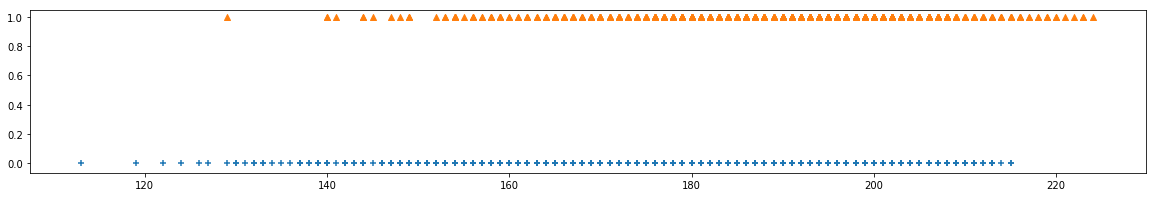

In [112]:
plt.figure(figsize=(20,3));
plt.scatter(features_pos.flatten(), np.zeros((features_pos.size,)), marker='+')
plt.scatter(features_neg.flatten(), np.ones((features_neg.size,)), marker='^')

In [53]:
from skimage.feature import greycoprops, greycomatrix

def get_glcm_feature_vector(patch, levels):

    glcm = greycomatrix(patch, [1, 2], [0, np.pi/2], levels=levels, normed=True, symmetric=True)

    g_contrast = greycoprops(glcm, prop='contrast')
    g_dissim = greycoprops(glcm, prop='dissimilarity')
    g_homo = greycoprops(glcm, prop='homogeneity')
    g_asm = greycoprops(glcm, prop='ASM')
    g_energy = greycoprops(glcm, prop='energy')
    g_corr = greycoprops(glcm, prop='correlation')

    g = np.r_[g_contrast.flatten(), 
    g_dissim.flatten(), 
    g_homo.flatten(), 
    g_asm.flatten(), 
    g_energy.flatten(), 
    g_corr.flatten()]
    return g